In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown as md
from collections import defaultdict

import report

#Shows all results of a cell output
InteractiveShell.ast_node_interactivity = "all"

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)

#Define here where the data and results are stored
data_dir=os.path.join(parent_dir,"data")
result_dir=os.path.join(parent_dir,'results',"GMM_OG")
gmm_dir=os.path.join(result_dir,"gmm_res_full")

annotations_files = [
    'anshika_annotations.pckl',
    'benjamin_annotations.pckl',
    'faheem_annotations.pckl'
]

ans = [True] * 400

for a in annotations_files:
    with open(a, "rb") as f:
        retrieved_data = np.array(pickle.load(f))
        ans &= retrieved_data

with open(os.path.realpath('../scripts/random_samples.txt')) as file:
    sample = [line.rstrip() for line in file]

file_paths = defaultdict(list)

# WARNING: assumed that path is relative, change substring if it's not
# Won't work with '730Li', '740Li' models
for i in np.argwhere(ans == True):
    img_path = sample[i[0]]
    if img_path[:8] != "../data/":
        raise Exception('Images path is not relative format expected!')
    file_paths[img_path[8:12]].append(os.path.realpath(img_path))

Score distribution for model: 320i

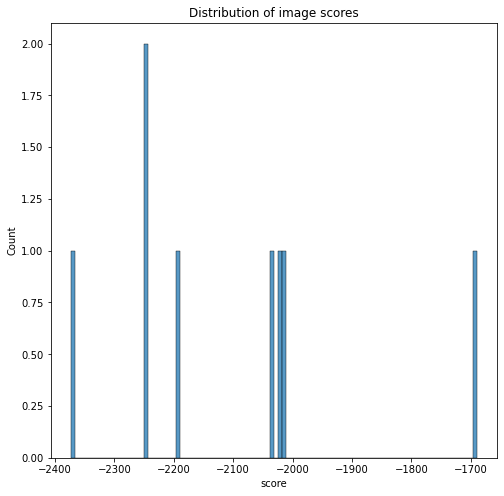


Distribution of scores and best five images for images split into 6 buckets. 
The score is divided by 10000 for readability

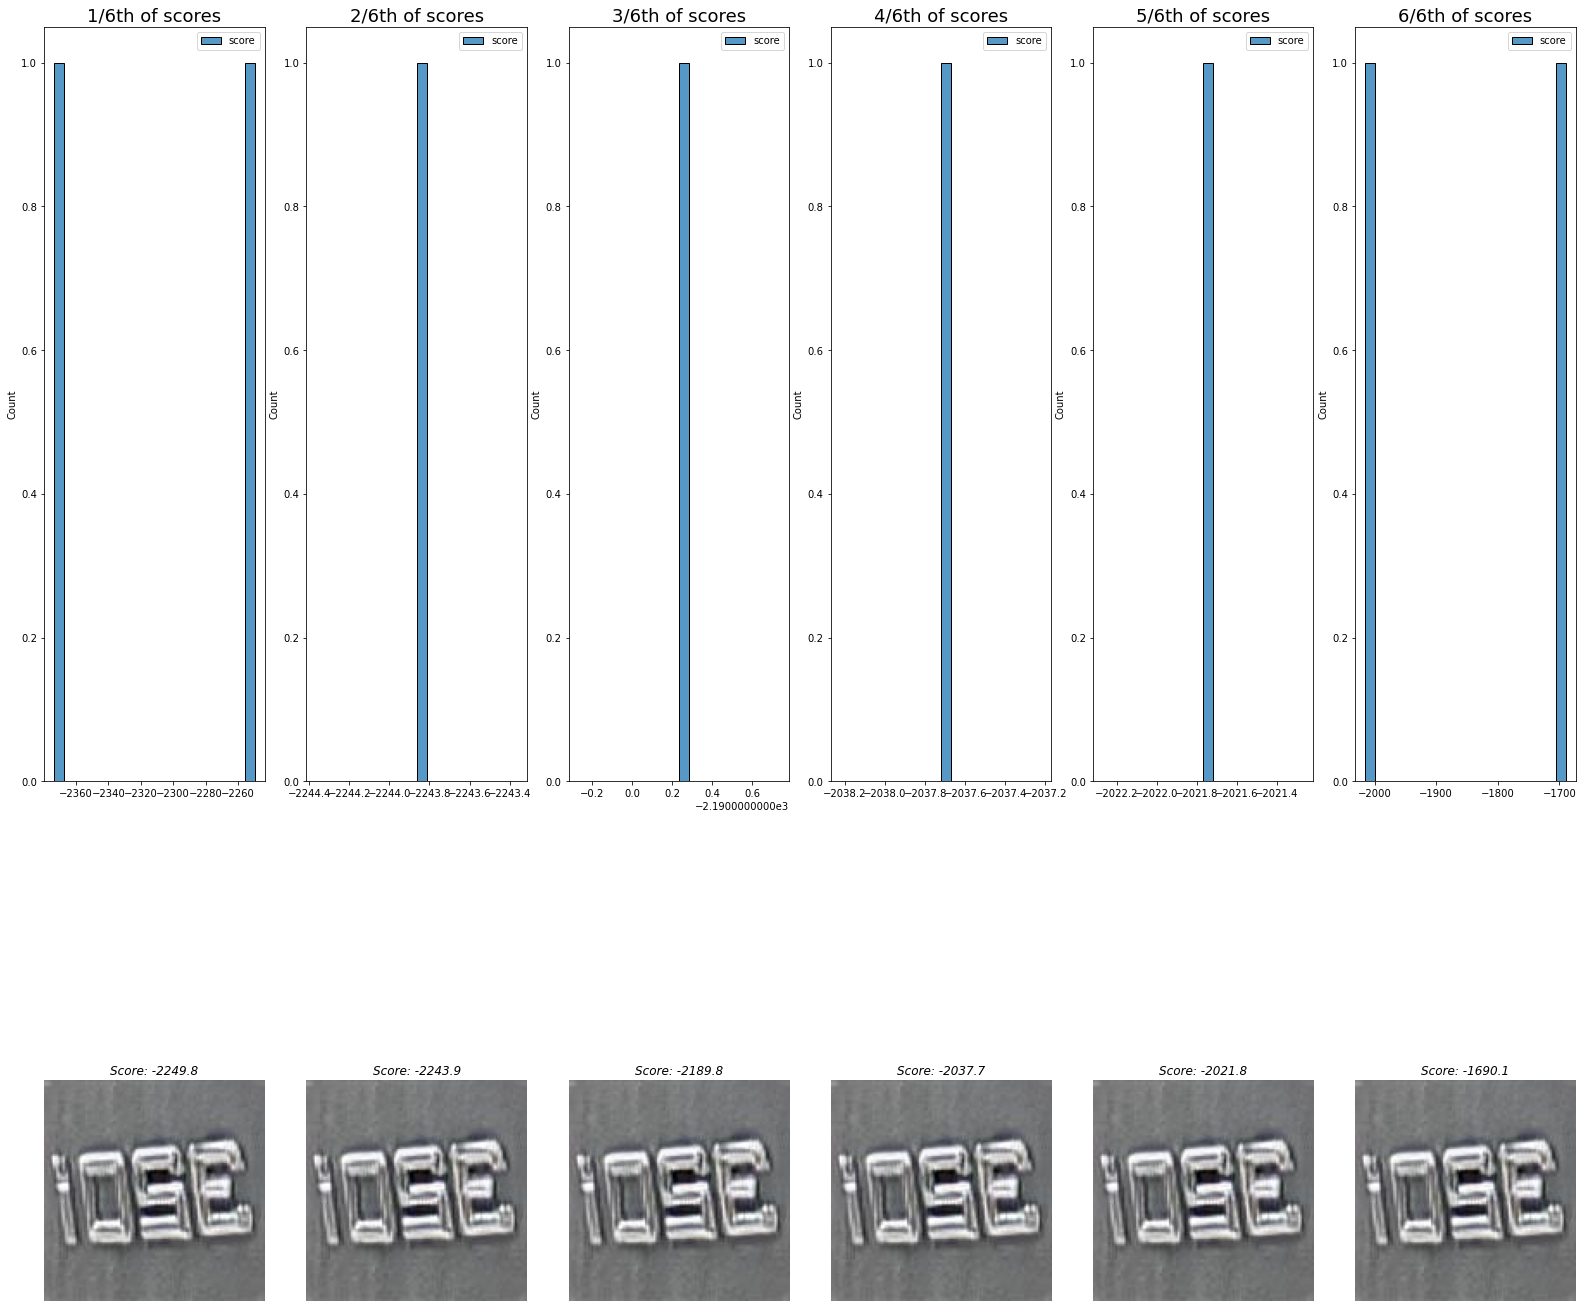

Score distribution for model: 330e

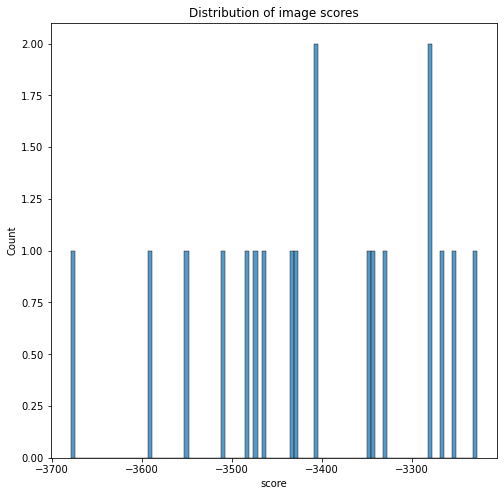


Distribution of scores and best five images for images split into 6 buckets. 
The score is divided by 10000 for readability

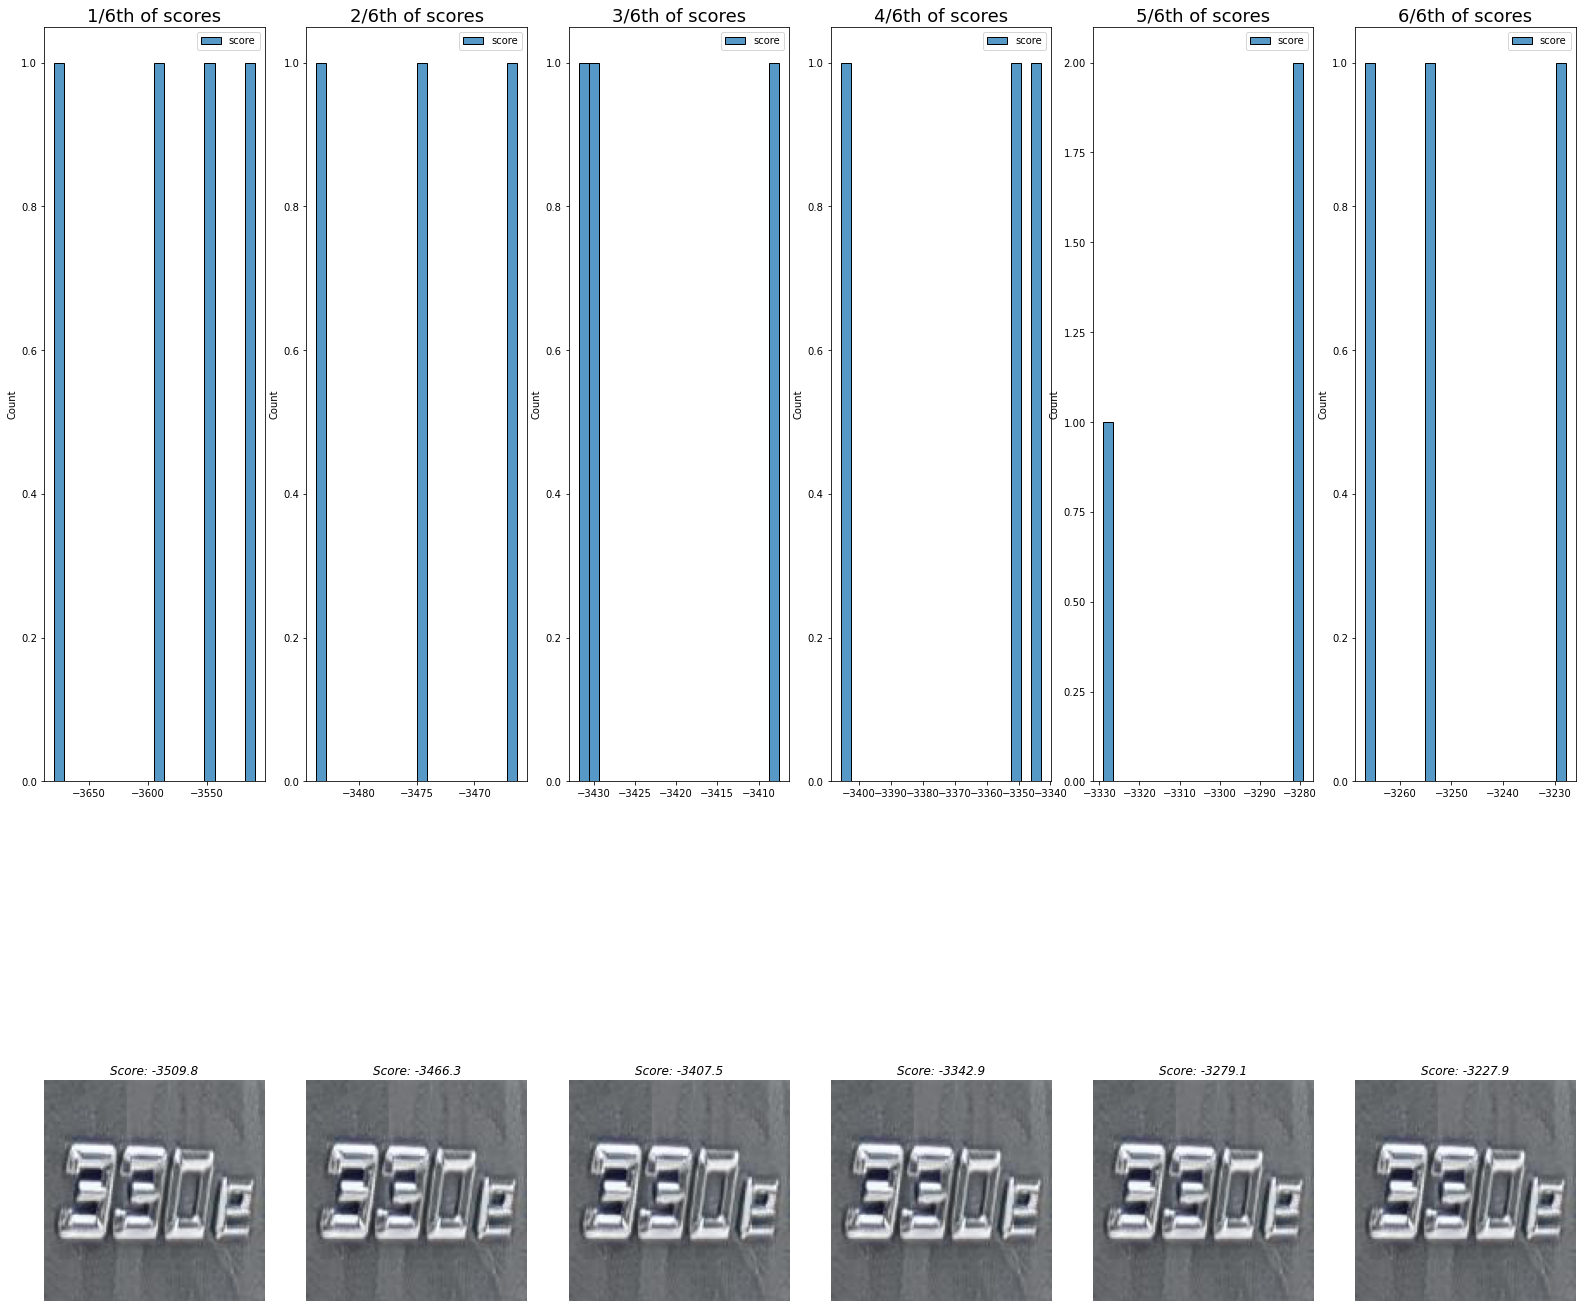

# LGIQA

## 320i LGIQA

There are 8 LGIQA results

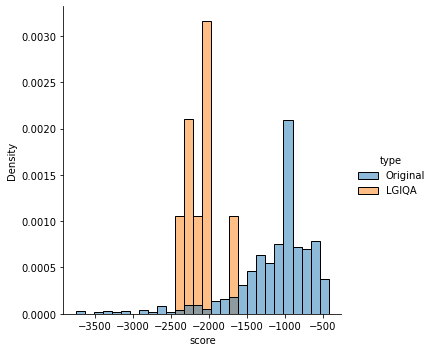

## 330e LGIQA

There are 19 LGIQA results

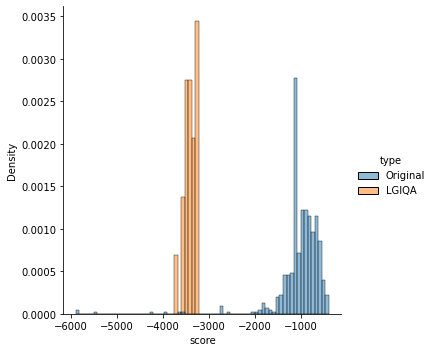

In [4]:
#settings for display
con_models=['320i','330e']
#con_models = []

divisor = 10000
depth = 6
bins = 6

for con_model in con_models:
    #paths to results and images
    gmm_dir_old = os.path.join(result_dir, "gmm_res")

    scores_path = os.path.join(gmm_dir_old, f'{con_model}_and_consensus_imgs.txt')

    #instantiating necessary data
    model_results = report.load_score(scores_path, bins=bins, divisor=divisor)
    buckets = model_results.score_bin_nr.unique().categories

    md(f'Score distribution for model: {con_model}')
    rcParams['figure.figsize'] = [8, 8]
    _ = sns.histplot(model_results['score'], bins=100).set(title="Distribution of image scores")
    plt.show()

    md(
        f'\nDistribution of scores and best five images for images split into {len(buckets)} buckets. \nThe score is divided by {divisor} for readability')
    report.plot_overview(buckets, model_results, file_paths[con_model], heigth=22, width=22, depth=2,
                         image_path_full=True)

md("# LGIQA")
for con_model in con_models:
    md(f'## {con_model} LGIQA')
    gmm_dir_old = os.path.join(result_dir, "gmm_res")
    scores_path_con = os.path.join(gmm_dir_old, f'{con_model}_and_consensus_imgs.txt')
    scores_path = os.path.join(gmm_dir_old, f'{con_model}tick50.txt')

    #instantiating necessary data
    model_results = report.load_score(scores_path, bins=bins, divisor=divisor)
    model_results['type'] = 'Original'
    model_results_con = report.load_score(scores_path_con, bins=bins, divisor=divisor)
    model_results_con['type'] = 'LGIQA'
    md(f'There are {len(model_results_con)} LGIQA results')
    model_results = model_results.append(model_results_con)
    model_results.drop(['score_bin', 'score_bin_nr'], axis=1, inplace=True)

    _ = sns.displot(model_results, x='score', stat="density", common_norm=False, hue="type")
    plt.show()